## <span style="color:lightblue;">Sieć Neuronowa typu ***Feed-Forward***</span>
1) **Opis zbiorów danych:** należy scharakteryzować zbiory danych tak, jak omawialiśmy je na ćwiczeniach. Mile widziana wizualizacja jak w projekcie z Irysami. 2x4 pkt.

2) **Przygotowanie danych:** opis wstępnej obróbki danych i sposobu podania ich sieci/kodowania - wpływ na liczbę neuronów. Podział na zbiory: treningowy, testowy i walidujący (jak i dlaczego tak). Być może konieczne jest uwzględnienie rodzaju sieci. Jeśli tak to dlaczego, jeśli nie to dlaczego? 2x5 pkt.

3) **Struktura sieci:** przedstawić wybrane na początku konfiguracje obu sieci (dla obu problemów). Wszystkie decyzje uzasadnić. 4x4 pkt.

4) **Uczenie sieci:** wskazać wybrane algorytmy i parametry uczenia sieci. Przedstawić osiągane rezultaty. Decyzje uzasadnić. 4x4 pkt.

5) **Wyniki:** ocenić osiągnięte wyniki tj. dokładność i precyzję, złożoność i zbieżność (wykład). Tam, gdzie się da 😊 przedstawić i zinterpretować krzywą ROC. Można wykorzystać gotowe kalkulatory lub „How to Plot a ROC Curve in Python (Step-by-Step)” https://www.statology.org/plot-roc-curve-python/ 4x4 pkt.

6) **Dostrajanie parametrów:** krytyczna część prac, czyli co, czemu i jak było zmieniane, jakie dawało to efekty – dlaczego? 4x5 pkt.

7) **Podsumowanie:** na zakończenie należy podsumować otrzymane wyniki dla 4 sieci. Zestawić je parami: raz dla danych, raz dla rodzaju sieci i wyciągnąć wnioski z otrzymanych wyników. 14 pkt.

## <span style="color:royalblue;">Zbiór Danych</span>
Zbiór danych ma na celu rozróżnienie gatunków pingwinów (Adelie, Gentoo, Chinstrap) na podstawie ich cech przy pomocy sieci neuronowej Feed-Forward

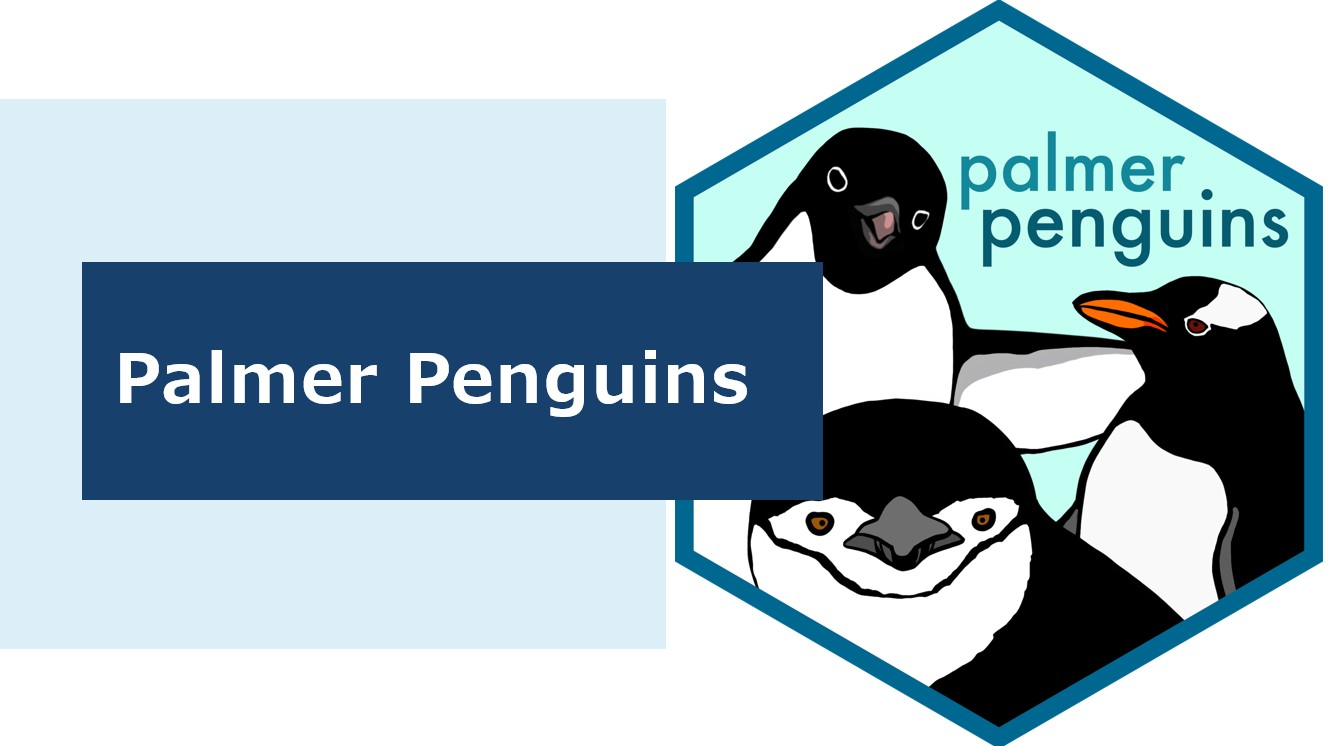

## <span style="color:royalblue;">Instalacja Bibliotek</span>
Poniżej znajdują się biblioteki, które wykorzystałem do zbudowania projektu

1) **palmerpenguins:** Biblioteka z zestawem danych o pingwinach, używana do nauki eksploracji danych.

2) **scikit-learn:** Biblioteka do uczenia maszynowego oferująca narzędzia do klasyfikacji, regresji i klasteryzacji.

3) **tensorflow:** Framework do budowy i trenowania modeli głębokiego uczenia z obsługą GPU i CPU.

4) **keras:** Wysokopoziomowa biblioteka do tworzenia sieci neuronowych oparta na TensorFlow.

5) **keras-tuner:** Narzędzie do automatycznego strojenia hiperparametrów w modelach Keras.

In [132]:
!pip install palmerpenguins
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install keras-tuner

## <span style="color:royalblue;">Importy</span>

Poniżej znajdują się moduły z bibliotek, które wykorzystałem do zbudowania projektu

1) **import pandas as pd:** Biblioteka pandas służy do manipulacji i analizy danych w formacie tabelarycznym.

2) **import numpy as np:** Biblioteka NumPy jest używana do obsługi wielowymiarowych tablic i przeprowadzania operacji matematycznych.

3) **import matplotlib.pyplot as plt:** Moduł Matplotlib do tworzenia wykresów i wizualizacji danych.

4) **import keras.src.callbacks:** Callbacki Keras, np. do wczesnego zatrzymania treningu modelu.

5) **from palmerpenguins import load_penguins:** Funkcja do załadowania zestawu danych o pingwinach Palmer.

6) **from collections import Counter:** Klasa Counter z modułu collections, do zliczania wystąpień elementów w iterowalnych obiektach.

7) **from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer:** Narzędzia do skalowania i kodowania zmiennych w preprocessing danych.

8) **from sklearn.model_selection import: train_test_split, StratifiedKFold:** Funkcje do podziału danych na zestawy treningowe/testowe i walidacji krzyżowej.

9) **from sklearn.metrics import: classification_report, confusion_matrix, roc_curve, auc:** Metryki do oceny wyników klasyfikacji i analizy modelu.

10) **from keras.src.layers import: Dense, Dropout:** Warstwy Dense i Dropout do tworzenia sieci neuronowych w Keras.

11) **from keras import: models, Input:** Narzędzia Keras do definiowania modelu i jego warstw wejściowych.

12) **from keras_tuner import Hyperband:** Algorytm Hyperband do automatycznego dostrajania hiperparametrów modelu.

13) **from keras.api.callbacks import EarlyStopping:** Callback EarlyStopping do przerwania treningu, gdy poprawa wyniku zatrzyma się.

14) **from keras.src.optimizers import Adam:** Optymalizator Adam do aktualizacji wag podczas treningu sieci neuronowej.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.src.callbacks

from palmerpenguins import load_penguins
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.src.layers import Dense, Dropout
from keras import models, Input
from keras_tuner import Hyperband
from keras.api.callbacks import EarlyStopping
from keras.src.optimizers import Adam

## <span style="color:royalblue;">Funkcje pomocniczne tworzące wykresy</span>
1) **penguins_numeric_data_plot:** Tworzy histogramy rozkładu dla cech numerycznych (np. długość dzioba, głębokość dzioba, długość płetwy) w zbiorze danych.

2) **penguins_species_count_plot:** Tworzy wykres kołowy, który pokazuje procentowy udział każdego gatunku pingwina w zbiorze danych.

3) **penguins_species_attributes_plot:** Pokazuje średnie wartości wybranych cech (np. długość dzioba, głębokość dzioba, długość płetwy) dla każdego gatunku pingwina w formie wykresu linii.

4) **penguins_species_weight_plot:** Wyświetla histogramy przedstawiające rozkład masy ciała dla różnych gatunków pingwinów.

5) **data_split_plot:** Rysuje wykres słupkowy pokazujący liczbę pingwinów w każdym gatunku w danym zbiorze danych (np. treningowym lub testowym).

6) **plot_missing_data:** Tworzy wykres słupkowy, który pokazuje liczbę brakujących danych w poszczególnych kolumnach zbioru danych.

7) **plot_roc_curve:** Rysuje wykresy ROC  dla wieloklasowej klasyfikacji, umożliwiając ocenę skuteczności modelu w rozróżnianiu poszczególnych klas.

8) **plot_training_history:** Generuje wykresy ilustrujące dokładność oraz stratę modelu Feed-Forward w trakcie treningu i walidacji, a także wypisuje podsumowanie wyników na końcu treningu.

In [134]:
# Wykres rozkładu danych numerycznych dla danego datasetu
def penguins_numeric_data_plot(numeric_data, data):
  fig, axis = plt.subplots(2, 2, figsize=(10, 8))
  i = 0
  for list_axis in axis:
      for ax in list_axis:
          ax.hist(data[numeric_data[i]], bins=20, color='skyblue', edgecolor='black')
          ax.set_title(f"Rozkład {numeric_data[i]}")
          ax.set_xlabel(numeric_data[i])
          ax.set_ylabel('Liczba wystąpień')
          i += 1
  plt.tight_layout()
  plt.show()

# Wykres przedstawiający liczbę pingwinów z danego gatunku
def penguins_species_count_plot():
    species_counts = penguins["species"].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(
        species_counts.values,
        labels=species_counts.index,
        autopct="%1.1f%%",
        colors=["skyblue", "lightgreen", "salmon"],
        startangle=90,
        wedgeprops={"edgecolor": "black", "linewidth": 1}
    )
    plt.title("Procentowy udział każdego gatunku pingwinów")
    plt.show()

# Wykres przedstawiający rozkład atrybutów pingwinów z danego gatunku
def penguins_species_attributes_plot():
    species_attributes = penguins.groupby("species")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].mean()
    plt.figure(figsize=(8, 5))
    for column in species_attributes.columns:
        plt.plot(species_attributes.index, species_attributes[column], marker="o", label=column)

    plt.title("Średnie wartości cech dla każdego gatunku pingwinów")
    plt.xlabel("Gatunek")
    plt.ylabel("Średnia wartość")
    plt.legend(title="Cecha", loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Wykres przedstawiający rozkład wagi pingwinów z danego gatunku
def penguins_species_weight_plot():
    plt.figure(figsize=(8, 5))
    for species in penguins["species"].unique():
        subset = penguins[penguins["species"] == species]
        plt.hist(
            subset["body_mass_g"],
            bins=15,
            alpha=0.5,
            label=species,
            edgecolor="black"
        )

    plt.title("Rozkład masy ciała w zależności od gatunku")
    plt.xlabel("Masa ciała (g)")
    plt.ylabel("Liczba pingwinów")
    plt.legend(title="Gatunek")
    plt.show()

# Wykres podziału danych dla danego zbioru
def data_split_plot(y, name):
    df = pd.DataFrame(y)
    species_counts = df.sum()
    species_labels = ['Chinstrap', 'Gentoo', 'Adélie']
    plt.figure(figsize=(8, 6))
    ax = species_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'], linewidth=2)
    for i, count in enumerate(species_counts):
        ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
    plt.title(f'Liczba pingwinów w poszczególnych gatunkach w zbiorze {name}')
    plt.xlabel('Gatunek')
    plt.ylabel('Liczba pingwinów')
    ax.set_xticklabels(species_labels)
    plt.xticks(rotation=0)
    plt.show()

# Wykresy przedstawiające podsumowanie trenowania danej sieci Feed-Forward
def plot_training_history(his, verbose=1):
    acc = his.history['accuracy']
    loss = his.history['loss']
    acc_val = his.history['val_accuracy']
    loss_val = his.history['val_loss']
    epochs = range(1, len(acc) + 1)
    fig, axes = plt.subplots(1, 2, figsize=(6, 3), gridspec_kw={'width_ratios': [1, 1]})

    # Wykres dokładności
    axes[0].plot(epochs, acc, label="Accuracy")
    if acc_val:
        axes[0].plot(epochs, acc_val, label="Validation Accuracy")
    axes[0].set_title("Accuracy")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend(loc='lower right')
    axes[0].set_aspect('auto')

    # Wykres straty
    axes[1].plot(epochs, loss, label="Loss")
    if loss_val:
        axes[1].plot(epochs, loss_val, label="Validation Loss")
    axes[1].set_title("Loss")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[1].legend(loc='upper right')
    axes[1].set_aspect('auto')
    plt.tight_layout()
    plt.show()

    # Wypisywanie wyników
    if verbose:
        print(f"{'-'*30}\n",f"Accuracy: {acc[-1] if acc else 'N/A'}\n",f"Validation Accuracy: {acc_val[-1] if acc_val else 'N/A'}\n",f"Loss: {loss[-1] if loss else 'N/A'}\n",f"Validation Loss: {loss_val[-1] if loss_val else 'N/A'}\n",f"{'-'*30}")

# Wykres krzywej ROC dla wieloklasowej klasyfikacji danego modelu
def plot_roc_curve(y_test, y_pred, n_classes):
    plt.figure(figsize=(8, 6))
    species_labels = ['Chinstrap', 'Gentoo', 'Adélie']

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{species_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Krzywa ROC dla wieloklasowej klasyfikacji')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.5)
    plt.show()

# Wykres pokazujący brakujące dane w kolumnach
def plot_missing_data(missing_data):
    plt.figure(figsize=(10, 6))
    missing_data[missing_data > 0].plot(kind='bar', color='skyblue')
    plt.title('Brakujące dane w kolumnach')
    plt.xlabel('Kolumny')
    plt.ylabel('Liczba brakujących wartości')
    plt.xticks(rotation=45)
    plt.show()


## <span style="color:royalblue;">Funkcje pomocniczne do pracy na sieciach typu Feed-Forward</span>

1) **create_model:** Funkcja tworzy model sieci neuronowej Feed-Forward z określoną liczbą warstw i neuronów, opcjonalnie z dropoutem, oraz kompiluje go przy użyciu optymalizatora Adam i funkcji strat kategorii cross-entropy.

2) **create_model_tuning:** Funkcja generuje model sieci neuronowej Feed-Forward z hiperparametrami przekazanymi przez obiekt hp, umożliwiając dynamiczne dostosowanie parametrów modelu.

3) **cross_validation_keras:** Funkcja przeprowadza kroswalidację z wykorzystaniem sieci Feed-Forward, trenując model na wielu foldach i oceniając jego dokładność oraz stratę, z możliwością tuningu hiperparametrów.

4) **cross_validation_RS:** Funkcja realizuje kroswalidację z zastosowaniem stratified K-Fold, trenując model na różnych foldach, oceniając jego skuteczność i zwracając średnią dokładność.

5) **CrossValHyperband:** Ulepszona klasa rozszerzająca Hyperband, która wykonuje tunning hiperparametrów w oparciu o kroswalidację, zatrzymując dalsze próby po osiągnięciu progu skuteczności.

In [135]:
# Funkcja tworząca prosty model sieci typu Feed-Forward
def create_model(lay_num=1, lay_neuron=40, dropout=False, activation = 'relu', learning_rate = 0.001):
    # Utworzenie modelu sieci neuronowej
    model = models.Sequential()

    # Warstwa wejściowa
    model.add(Input(shape=(X_train.shape[1],)))

    # Warstwa ukryta
    for i in range(lay_num):
        model.add(Dense(lay_neuron, activation = activation))

    # Wyłączenie neuronów w celu nie przeuczenia sieci
    if dropout:
        model.add(Dropout(rate=0.1))

    # Warstwa wyjściowa
    model.add(Dense(y_train.shape[1], activation = 'softmax'))

    # Kompilacja modelu
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=learning_rate), metrics = ['accuracy'])
    return model

# Funkcja tworząca hiperparametry dla naszej sieci typu Feed-Forward
def create_model_tuning(hp):
    # Tworzenie hiperparametrów w naszym obiekcie
    lay_neuron = hp.Int("lay_neuron", min_value=2, max_value=80, step=4)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lay_num= hp.Int("lay_num", min_value=1, max_value=5, step=1)
    learning_rate = hp.Choice("learning_rate", [1e-4,1e-3,1e-2])

    # Tworzenie modelu
    model = create_model(activation=activation, dropout=dropout, lay_neuron=lay_neuron, lay_num=lay_num, learning_rate=learning_rate)
    return model


# Funkcja do przeprowadzenia walidacji krzyżowej dla sieci podstawowej Feed-Forward
def cross_validation_keras(create_model, X, y, lay_num=1, lay_neuron=30,dropout=False, activation='relu',verbose=0, k_folds=5, learning_rate=0.001, hp=None):
    call = True
    y = pd.DataFrame(y)

    # Definicja potrzebnych zmiennych
    kfold = StratifiedKFold(n_splits=k_folds, shuffle=True)
    history_fold = []
    model_fold = []
    score_fold = []
    fold_no = 1
    overfit_callback = keras.src.callbacks.early_stopping.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Pętla kroswalidacji
    for i ,(train_i, test_i) in enumerate(kfold.split(X, np.argmax(y,axis=1))):
        # Podział danych na treningowe i testowe dla danego foldu
        X_train, X_test = X.iloc[train_i], X.iloc[test_i]
        y_train, y_test = y.iloc[train_i], y.iloc[test_i]

        # Tworzenie modelu
        if hp is None:
            model = create_model(lay_neuron=lay_neuron, lay_num=lay_num, dropout=dropout, activation=activation, learning_rate=learning_rate)
        else:
            model = create_model_tuning(hp)

        if verbose:
            print(f"Training model for kfold {i+1}...")

        # Trenowanie modelu
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 5, epochs = 100, verbose = 0,callbacks=[overfit_callback] if call else None)

        # Ocena modelu
        score = model.evaluate(X_test, y_test, verbose=0)

        # Zapisanie wyników
        score_fold.append(score[1])
        history_fold.append(history)
        model_fold.append(model)

        # Wypisanie podsumowania
        if verbose:
            print(f"Score for {fold_no}:\n Acc: {score[1]}\n Loss: {score[0]}")
            fold_no = fold_no + 1
    return history_fold, model_fold, np.mean(score_fold)

# Funkcja tworzaca walidację krzyżową z wykorzystaniem stratified K-Fold
def cross_validation_RS(X, y, hp):
    call = True
    y = pd.DataFrame(y)

    # Inicjalizacja stratified K-Fold dla podziału danych
    kfold = StratifiedKFold(n_splits=4, shuffle=True)
    score_fold = []

    # Callback do wczesnego zatrzymania treningu, gdy nie następuje poprawa walidacyjna
    overfit_callback = keras.src.callbacks.early_stopping.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True
    )

    # Pętla przez wszystkie foldy podziału K-Fold
    for train_i, test_i in kfold.split(X, np.argmax(y, axis=1)):
        # Podział danych na treningowe i testowe dla danego foldu
        X_train, X_test = X.iloc[train_i], X.iloc[test_i]
        y_train, y_test = y.iloc[train_i], y.iloc[test_i]

        # Tworzenie modelu z aktualnymi hiperparametrami
        model = create_model_tuning(hp)

        # Trenowanie modelu na danych treningowych, walidacja na testowych
        _ = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size=10,
            epochs=100,
            verbose=0,
            callbacks=[overfit_callback] if call else None
        )

        # Ocena modelu na danych testowych
        score = model.evaluate(X_test, y_test, verbose=0)

        # Zapis wyniku (accuracy) dla danego foldu
        score_fold.append(score[1])

    # Zwracanie średniego wyniku z walidacji (accuracy)
    return np.mean(score_fold)

# Ulepszona klasa RandomSearch, która liczy błąd w oparciu o krzyżową walidację
class CrossValHyperband(Hyperband):
    def run_trial(self, trial, *args, **kwargs):
        x = kwargs['x']
        y = kwargs['y']
        val_score = cross_validation_RS(x,y, trial.hyperparameters)

        # Zatrzymanie tuningu po osiągnięciu progu skuteczności
        if val_score >= 0.90:
            print(f"Desired accuracy reached: {val_score:.4f}. Stopping further trials.")
            self.oracle.update_trial(trial.trial_id, {'val_accuracy': val_score})
            self.oracle.end_trial(trial.trial_id)
            self.stop_search = True
            return
        self.oracle.update_trial(trial.trial_id, {'val_accuracy': val_score})

## <span style="color:royalblue;">Eksploracja danych</span>

 Mój zbiór danych pochodzi z zestawu Palmer Penguins, który jest popularnym zbiorem do analizy i wizualizacji danych, składającym się z cech opisujących pingwiny. Oto jego opis:

### Kolumny: ###
1) **island:** Wyspa, na której zaobserwowano pingwina (Torgersen, Dream, Biscoe).

2) **bill_length_mm:** Długość dzioba w milimetrach.

3) **bill_depth_mm:** Głębokość dzioba w milimetrach.

4) **flipper_length_mm:** Długość płetwy w milimetrach.

5) **body_mass_g:** Masa ciała w gramach.

6) **sex:** Płeć pingwina (male lub female).

7) **year:** Rok, w którym zaobserwowano pingwina.

### Charakterystyka: ###
Dane są zróżnicowane pod względem geograficznym (różne wyspy) i biologicznym (różne cechy morfologiczne i płeć).

Zbiór danych zawiera zmienne zarówno kategoryczne (island, sex, year), jak i numeryczne (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g).

Dane zostały zebrane w latach 2007–2009.

In [136]:
# Wczytanie danych
penguins = load_penguins()

# Liczba obserwacji przed usunięciem brakujących danych
buf = penguins.shape[0]

# Sprawdzenie brakujących informacji w danych
missing_data = penguins.isna().sum()

# Usunięcie wierszy z brakującymi danymi
penguins = penguins.dropna()

# Liczba usuniętych wierszy z brakującymi danymi
deleted_na = buf - penguins.shape[0]

# Przypisanie zmiennej docelowej (y) oraz zbioru cech (X)
y = penguins.copy()['species']
X = penguins.copy()

# Usunięcie brakujących danych w X oraz usunięcie kolumny 'species' (to będzie target)
X.dropna(inplace=True, ignore_index=True)
X.pop('species')

# Pokazanie przykładowych 10 rekordów po czyszczeniu
X.sample(10)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
99,Biscoe,39.7,18.9,184.0,3550.0,male,2009
131,Dream,40.2,20.1,200.0,3975.0,male,2009
281,Dream,50.3,20.0,197.0,3300.0,male,2007
139,Dream,39.0,18.7,185.0,3650.0,male,2009
14,Torgersen,46.0,21.5,194.0,4200.0,male,2007
218,Biscoe,46.4,15.0,216.0,4700.0,female,2008
66,Torgersen,39.6,17.2,196.0,3550.0,female,2008
221,Biscoe,51.1,16.3,220.0,6000.0,male,2008
180,Biscoe,48.4,16.3,220.0,5400.0,male,2008
10,Torgersen,36.6,17.8,185.0,3700.0,female,2007


In [137]:
# Tabela podsumowująca informacje w dataset palmerpenguins
X.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Usunięto następującą liczbę rekordów z brakującymi danymi: 11


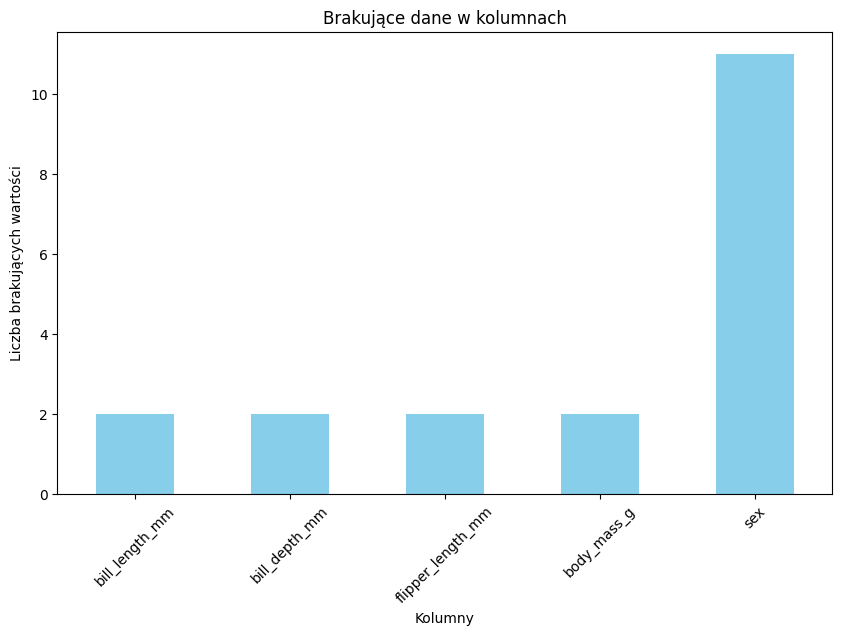

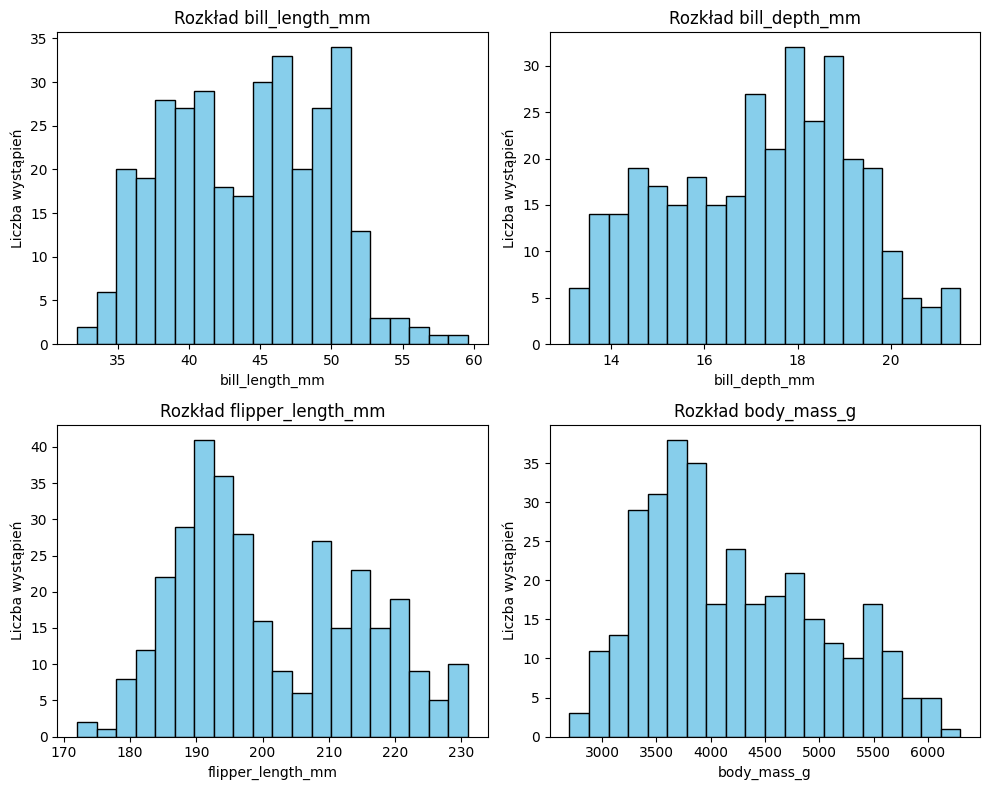

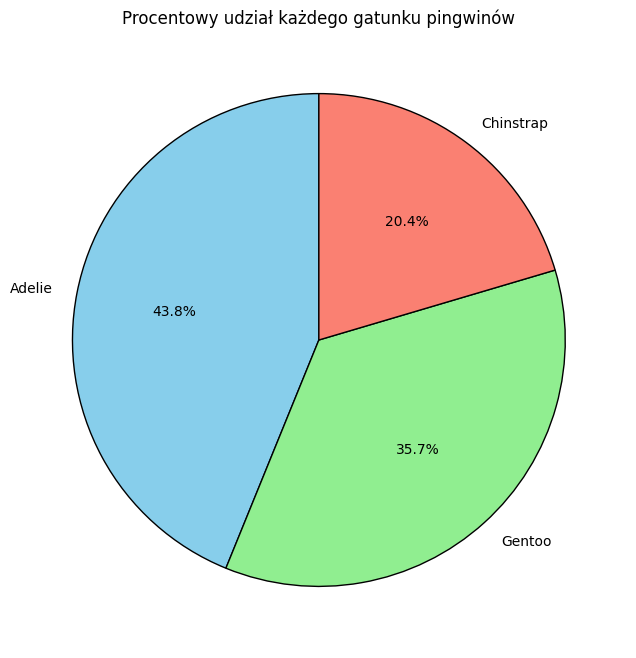

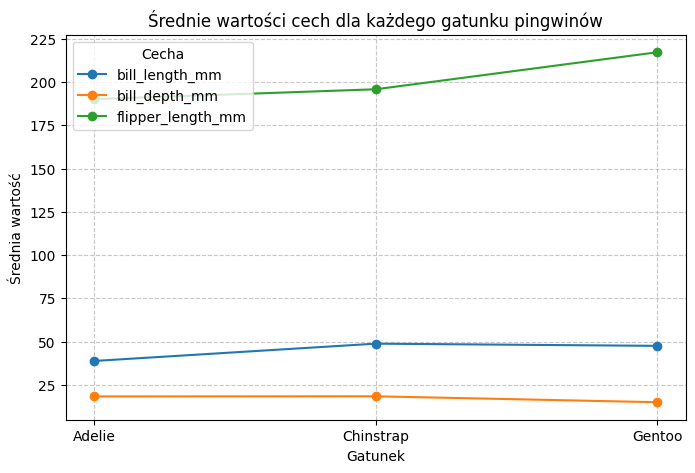

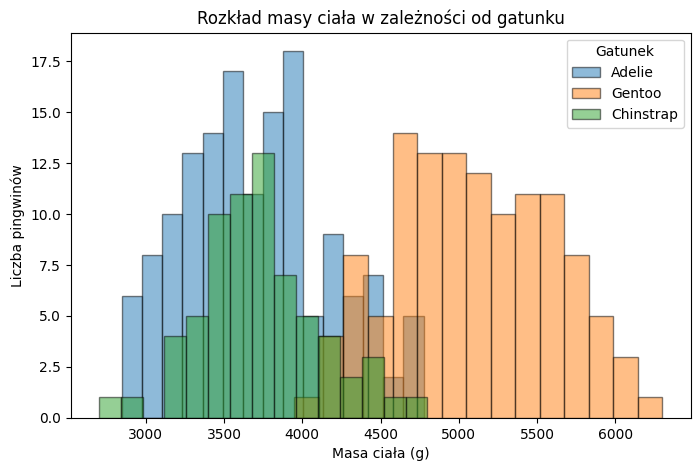

In [138]:
# Informacje podsumowujące dataset palmerpenguins
print(f"Usunięto następującą liczbę rekordów z brakującymi danymi: {deleted_na}")
plot_missing_data(missing_data)
numeric_data = ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g')
penguins_numeric_data_plot(numeric_data, penguins)
penguins_species_count_plot()
penguins_species_attributes_plot()
penguins_species_weight_plot()

## <span style="color:royalblue;">Przygotowanie danych</span>
1) **Skalowanie cech numerycznych:** Użycie MinMaxScaler przekształca cechy do zakresu [0, 1], co przyspiesza i stabilizuje uczenie modelu.

2) **One-Hot Encoding:** Kategoryczne cechy zostały zakodowane na wektory binarne.

3) **Zmienne docelowe:** Zmienna docelowa została przekształcona przy pomocy LabelBinarizer co jest standardem w klasyfikacji wieloklasowej.

4) **Podział danych:** Train/Test Split: Zbiór danych podzielono na 80% treningowy i 20% testowy z zachowaniem proporcji klas, co zapewnia reprezentatywność danych w obu zbiorach.

5) **Brak zbioru walidacyjnego:** W tym przypadku, zbiór walidacyjny nie został oddzielony ponieważ liczba danych jest dosyć mała i sieć Feed-Forward może być trenowana i oceniana na tym samym zbiorze testowym. W tym celu zaimplementowałem walidację krzyżową dla modelów sieci.

In [139]:
# Definicja cech numerycznych i kategorycznych
numerical = ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g')
categorical = ['island', 'sex', 'year']

# Skalowanie cech numerycznych za pomocą MinMaxScaler
for cat in numerical:
    transformer = MinMaxScaler()
    transformer.fit(X[cat].values.reshape(-1, 1))
    X_transformed = pd.DataFrame(transformer.transform(X[cat].values.reshape(-1, 1)))
    X_transformed.columns = [f"{cat}_SCAL" for i in range(X_transformed.shape[1])]

    # Dołączanie nowych skalowanych cech do X i usuwanie oryginalnej kolumny
    X = pd.concat([X, X_transformed], axis=1)
    X.drop(cat, axis=1, inplace=True)

# One-Hot Encoding dla cech kategorycznych
for cat in categorical:
    transformer = OneHotEncoder(sparse_output=False)
    transformer.fit(X[cat].values.reshape(-1, 1))
    X_transformed = pd.DataFrame(transformer.transform(X[cat].values.reshape(-1, 1)))
    X_transformed.columns = [f"{cat}_{i+1}_OH" for i in range(X_transformed.shape[1])]

    # Dołączanie zakodowanych cech do X i usuwanie oryginalnej kolumny
    X = pd.concat([X, X_transformed], axis=1)
    X.drop(cat, axis=1, inplace=True)

# One-Hot Encoding dla zmiennej docelowej (y)
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [140]:
# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Zamiana one-hot encoding na etykiety klasowe
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Sprawdzenie rozkładu klas
print(Counter(y_train_labels), Counter(y_test_labels))
print(X_train.shape, X_test.shape)

Counter({0: 117, 2: 95, 1: 54}) Counter({0: 29, 2: 24, 1: 14})
(266, 12) (67, 12)


### Ostatecznie przekształcone dane z zestawu Palmer Penguins wyglądają następująco: ###

1) **Czyszczenie danych:** Usunięto wiersze z brakującymi danymi, co zmniejszyło liczbę obserwacji w zbiorze.
Kolumna docelowa species została oddzielona jako zmienna docelowa y, a pozostałe cechy (X) poddano dalszej obróbce.

2) **Skalowanie cech numerycznych:** Cechy ciągłe (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) zostały przeskalowane do zakresu [0, 1] za pomocą MinMaxScaler.
Nowe kolumny ze skalowanymi wartościami zostały oznaczone sufiksem _SCAL, np. bill_length_mm_SCAL.

3) **Kodowanie cech kategorycznych:** Zmieniono wartości kategoryczne (island, sex, year) na reprezentację One-Hot Encoding:
Każda unikalna wartość cechy kategorycznej została zamieniona na odrębne kolumny binarne. Na przykład island przyjęła postać island_1_OH, island_2_OH, i island_3_OH.

4) **Kodowanie zmiennej docelowej:** Zmienna species została zakodowana binarnie za pomocą LabelBinarizer (np. Adelie, Gentoo, Chinstrap reprezentowane jako macierz binarna).

5) **Podział na zbiory treningowy i testowy:** Dane zostały podzielone na:
Zbiór treningowy (80%) i testowy (20%).
Podział zachował proporcje klas (stratify=y).

In [141]:
# Nagłówek dla atrubutów treningu
X_train.head()

,bill_length_mm_SCAL,bill_depth_mm_SCAL,flipper_length_mm_SCAL,body_mass_g_SCAL,island_1_OH,island_2_OH,island_3_OH,sex_1_OH,sex_2_OH,year_1_OH,year_2_OH,year_3_OH
35,0.160000,0.583333,0.169492,0.125000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
327,0.494545,0.464286,0.389831,0.263889,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
97,0.207273,0.821429,0.305085,0.430556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
230,0.410909,0.154762,0.779661,0.527778,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
149,0.650909,0.250000,0.779661,0.833333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


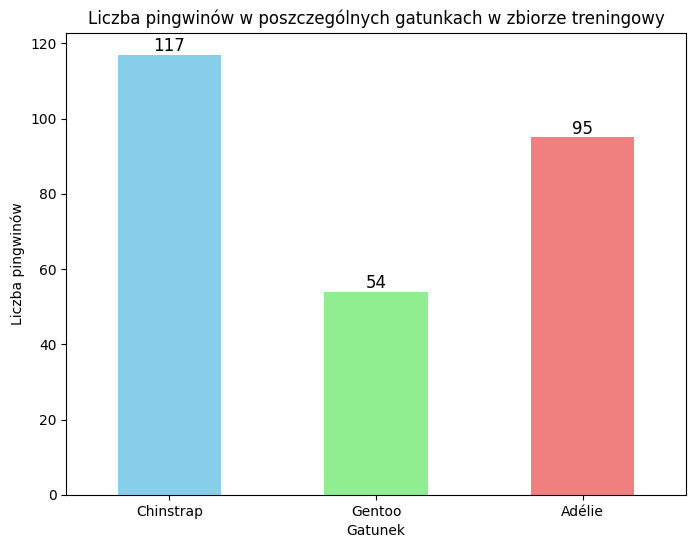

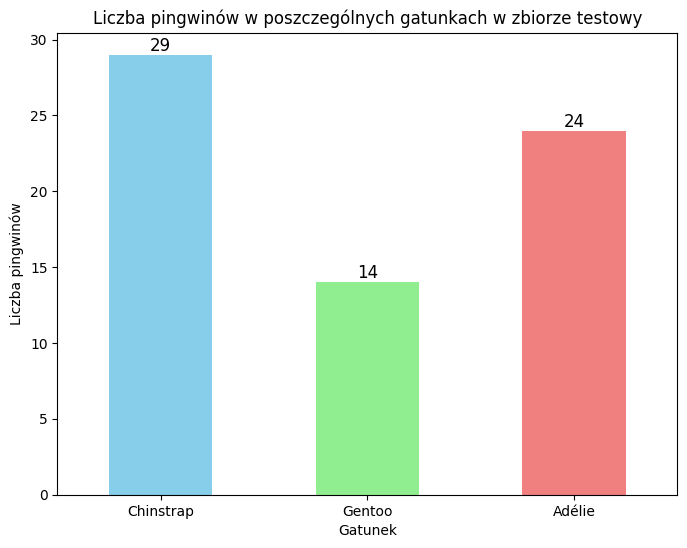

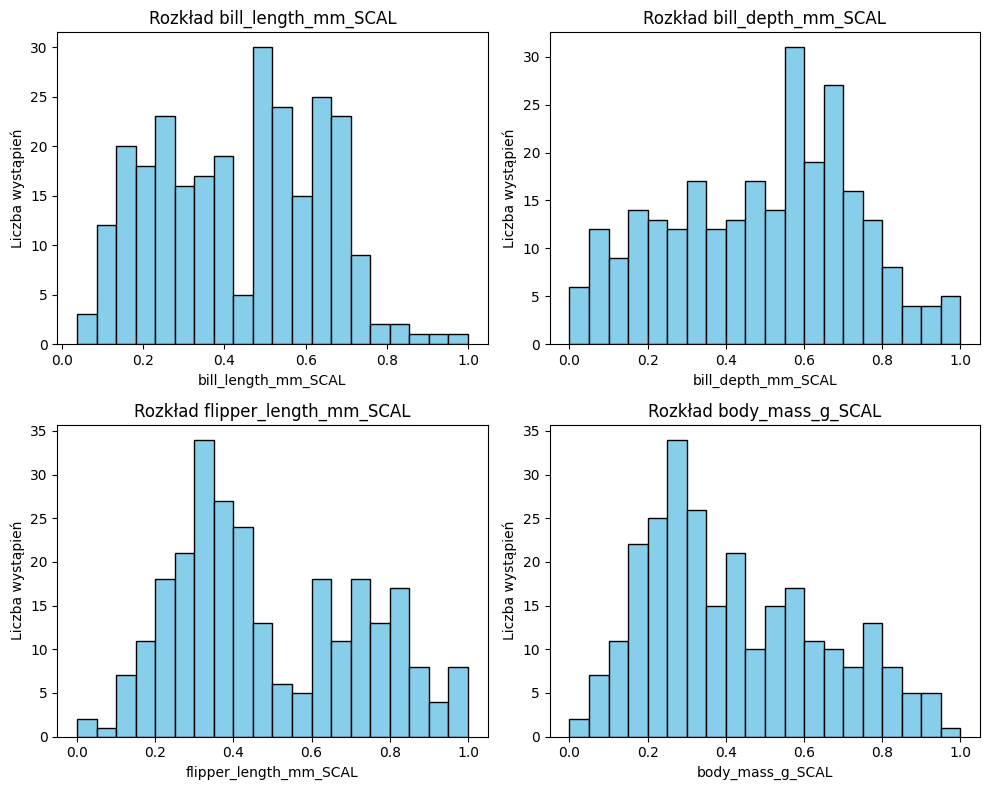

In [142]:
# Informacje podsumowujące podział dataset palmerpenguins do sieci
data_split_plot(y_train, 'treningowy')
data_split_plot(y_test, 'testowy')
numeric_data = ('bill_length_mm_SCAL', 'bill_depth_mm_SCAL', 'flipper_length_mm_SCAL', 'body_mass_g_SCAL')
penguins_numeric_data_plot(numeric_data, X_train)

## <span style="color:royalblue;">Prosta Sieć Neuronowa Typu Feed-Forward</span>

1)  **Architektura sieci:** Sieć zaczyna od warstwy wejściowej, której liczba neuronów jest równa liczbie cech w zbiorze danych. Następnie, sieć może mieć jedną lub więcej warstw ukrytych z konfigurowalną liczbą neuronów (domyślnie 40) i funkcją aktywacji (domyślnie ReLU).
Opcjonalnie można dodać warstwę Dropout, aby zapobiec przeuczeniu.
Warstwa wyjściowa wykorzystuje funkcję aktywacji softmax, co pozwala na wieloklasową klasyfikację.

2) **Trening i regularyzacja:** Model wykorzystuje optymalizator Adam z konfigurowalnym współczynnikiem uczenia (domyślnie 0.001) oraz stratę categorical_crossentropy. Mechanizm EarlyStopping monitoruje stratę walidacyjną, zatrzymując trening, jeśli nie ma poprawy przez 15 epok, a następnie przywraca najlepsze wagi.

3) **Ewaluacja:** Model osiąga doskonałą dokładność na zbiorze testowym (1.0) z wysokimi metrykami precyzji, czułości i F1-score we wszystkich klasach.
Macierz konfuzji potwierdza, że model poprawnie klasyfikuje wszystkie przykłady.

4) **Wizualizacja wyników:** Historia treningu jest wizualizowana za pomocą wykresów strat i dokładności.
Wykres ROC ilustruje jakość klasyfikacji dla każdej klasy, oceniając model w kontekście różnych progów.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


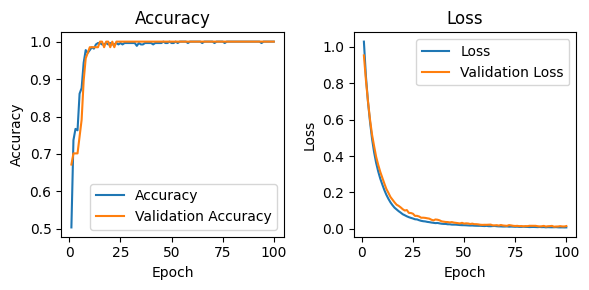

------------------------------
 Accuracy: 1.0
 Validation Accuracy: 1.0
 Loss: 0.00811407808214426
 Validation Loss: 0.015410599298775196
 ------------------------------


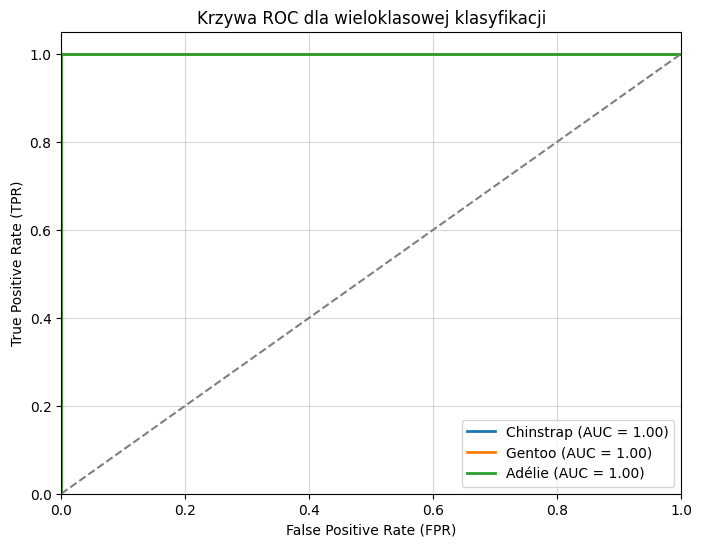

In [143]:
# Trening modelu podstawowego sieci typu Feed-Forward
model = create_model()
earlyStopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=5, callbacks=[earlyStopping], verbose=0)

# Ocena modelu
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Podsumowanie wyników
print("Classification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes))

# Rysowanie wykresów
plot_training_history(history)
plot_roc_curve(y_test, y_pred, y_pred.shape[1])

### Walidacja krzyżowa (k-fold cross-validation) ###
dzieli dane na k podzbiorów (folds), gdzie każdy podzbiór raz pełni rolę danych testowych, a pozostałe stanowią zbiór treningowy.
Pomaga to zmniejszyć ryzyko przeuczenia modelu na określonym podziale danych, dostarczając bardziej uogólnione wyniki.

### Implementacja kroswalidacji ###

1) **Konstrukcja pętli:** Dane są dzielone na k równych części za pomocą StratifiedKFold, co zapewnia równowagę klas w każdym foldzie.
Model jest trenowany i oceniany na każdym foldzie, co daje k wyników dokładności i strat.

2) **Wykorzystanie callbacków:** Mechanizm EarlyStopping zatrzymuje trening, gdy strata walidacyjna nie poprawia się przez 20 epok, co ogranicza przeuczenie.
Dynamiczne tworzenie modelu:

3) Model jest budowany dla każdego folda z opcją konfiguracji hiperparametrów (liczba warstw, liczba neuronów, dropout itp.).

### Wyniki walidacji ###

1) Wyniki dla każdego folda pokazują wysoką dokładność i niską stratę:

2) Dokładność treningowa waha się od ~97% do 100%, co świadczy o zdolności modelu do dopasowania danych.

3) Dokładność walidacyjna jest stabilna, wynosi od ~98% do 100%, co wskazuje na dobrą uogólnialność modelu na nowych danych.

4) Strata treningowa i walidacyjna są niskie, co potwierdza skuteczność modelu w minimalizacji błędów.

5) Średnia dokładność dla wszystkich foldów wynosi ~98-99%, co pokazuje stabilność i niezawodność modelu.

In [144]:
# Walidacja krzyżowa modelu podstawowego sieci typu Feed-Forward
history, _, _ = cross_validation_keras(create_model, X_train, y_train)

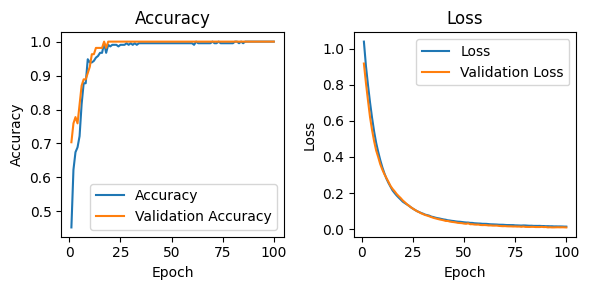

------------------------------
 Accuracy: 1.0
 Validation Accuracy: 1.0
 Loss: 0.014205348677933216
 Validation Loss: 0.00978585984557867
 ------------------------------


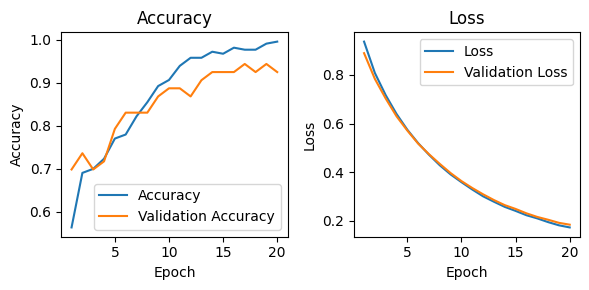

------------------------------
 Accuracy: 0.9953051805496216
 Validation Accuracy: 0.9245283007621765
 Loss: 0.1727094203233719
 Validation Loss: 0.18400225043296814
 ------------------------------


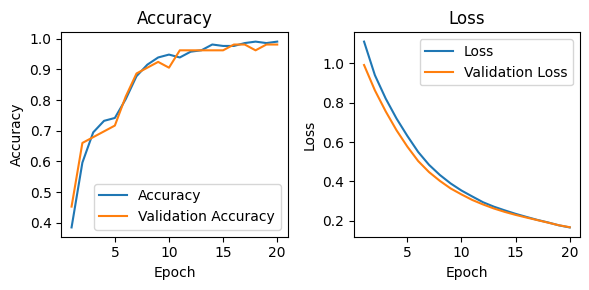

------------------------------
 Accuracy: 0.9906103014945984
 Validation Accuracy: 0.9811320900917053
 Loss: 0.1654943972826004
 Validation Loss: 0.16657349467277527
 ------------------------------


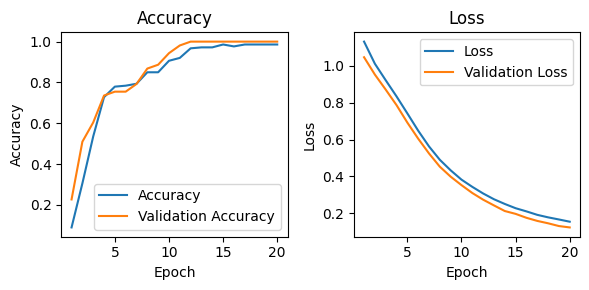

------------------------------
 Accuracy: 0.98591548204422
 Validation Accuracy: 1.0
 Loss: 0.1535794585943222
 Validation Loss: 0.12246722728013992
 ------------------------------


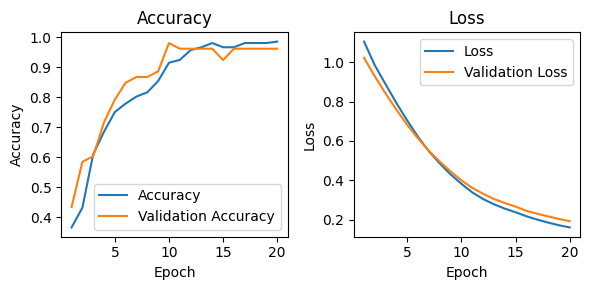

------------------------------
 Accuracy: 0.98591548204422
 Validation Accuracy: 0.9622641801834106
 Loss: 0.1618761271238327
 Validation Loss: 0.19342346489429474
 ------------------------------


In [145]:
for his in history:
    plot_training_history(his)

## <span style="color:royalblue;">Dostrajanie Parametrów</span>

### 1. Tuning hiperparametrów z wykorzystaniem RandomSearch i Hyperband ###

**Klasyczne rozwiązanie:** Klasyczny model najczęściej opiera się na statycznych ustawieniach hiperparametrów, takich jak liczba warstw, liczba neuronów czy szybkość uczenia. Te parametry są określane ręcznie, co może prowadzić do suboptymalnych wyników.

**Dostrojenie parametrów:** Używasz RandomSearch oraz Hyperband (CrossValHyperband), które są bardziej zaawansowanymi metodami optymalizacji hiperparametrów. RandomSearch pozwala na próbę różnych kombinacji parametrów w sposób losowy, a Hyperband automatycznie dobiera najlepsze hiperparametry na podstawie wcześniejszych wyników, jednocześnie ograniczając liczbę prób w zależności od osiąganego wyniku. To pozwala na bardziej efektywne i systematyczne dopasowanie hiperparametrów do modelu.

### 2. Wykorzystanie walidacji krzyżowej ###

**Klasyczne rozwiązanie:** W klasycznym podejściu model jest zazwyczaj trenowany na jednej podzielonej próbce danych (np. na zestawie treningowym) i oceniany na zestawie testowym. Może to prowadzić do overfittingu, jeśli dane testowe są nieodpowiednio reprezentatywne.

**Dostrojenie parametrów:** Wykorzystujemy Stratified K-Fold Cross Validation, co oznacza, że dane są dzielone na k równych części (foldy), a model jest trenowany na różnych zestawach treningowych i oceniany na zestawach testowych. Dzięki temu model jest bardziej odporny na overfitting, ponieważ jest oceniany na wielu zestawach testowych, co zapewnia lepszą generalizację.

### 3. Regularizacja za pomocą Dropout ###
Klasyczne rozwiązanie: W klasycznym podejściu często używa się statycznych ustawień liczby warstw i liczby neuronów, bez dodatkowych technik regularizacyjnych.

**Dostrojenie parametrów:** Zastosowanie Dropout pozwala na wyłączenie części neuronów w trakcie treningu, co zmniejsza ryzyko przeuczenia modelu (overfittingu). Dodatkowo, sama opcja włączenia lub wyłączenia Dropout jest dynamicznie kontrolowana w procesie tuningu hiperparametrów.

### 4. Wczesne zatrzymanie (Early Stopping) ###

**Klasyczne rozwiązanie:** W klasycznym rozwiązaniu proces treningu może być zakończony po ustalonym czasie lub liczbie epok, niezależnie od wyników.

**Dostrojenie parametrów:** Wykorzystujemy EarlyStopping, które zatrzymuje trening, jeśli model nie wykazuje dalszej poprawy na zestawie walidacyjnym (monitoruje val_loss lub val_accuracy). Dzięki temu unikamy przeuczenia i niepotrzebnego wydłużania czasu treningu, gdy model osiągnie optymalny wynik.

### 5. Automatyczne zatrzymywanie prób w przypadku osiągnięcia progu skuteczności ###

**Klasyczne rozwiązanie:** Klasyczna metoda trenowania nie uwzględnia progów skuteczności, co oznacza, że tuning może trwać długo bez względu na to, czy model osiągnął wystarczający poziom dokładności.

**Dostrojenie parametrów:** W CrossValHyperband dodajesz mechanizm zatrzymywania prób, jeśli osiągnięta zostanie wymagane dokładność (np. 90%). Dzięki temu proces poszukiwania najlepszego modelu jest bardziej efektywny, a czas nie jest marnowany na dalsze nieoptymalne konfiguracje.


**W efekcie, dzięki tym technikom Twoje modele są bardziej dopasowane, a proces ich trenowania jest bardziej wydajny i odporny na overfitting.**

Reloading Tuner from ./penguin_model_tuning/tuner0.json


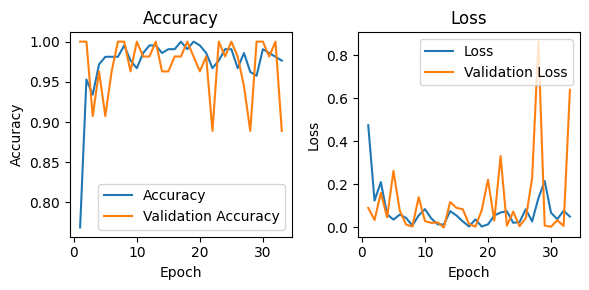

------------------------------
 Accuracy: 0.9764150977134705
 Validation Accuracy: 0.8888888955116272
 Loss: 0.050558269023895264
 Validation Loss: 0.639468252658844
 ------------------------------


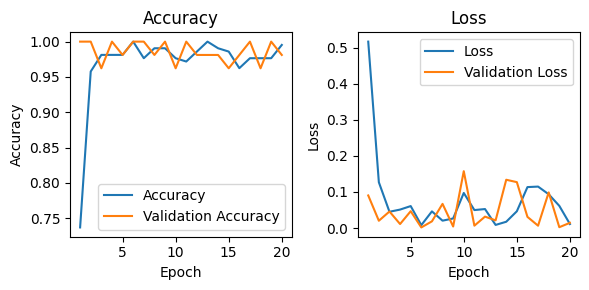

------------------------------
 Accuracy: 0.9953051805496216
 Validation Accuracy: 0.9811320900917053
 Loss: 0.011101844720542431
 Validation Loss: 0.014502109959721565
 ------------------------------


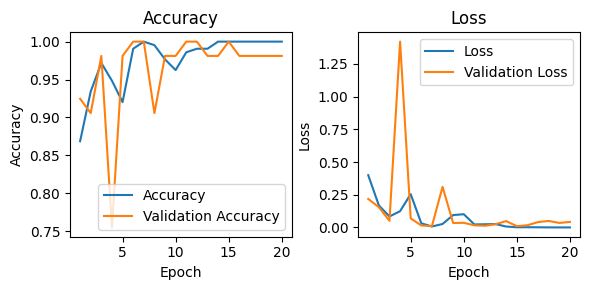

------------------------------
 Accuracy: 1.0
 Validation Accuracy: 0.9811320900917053
 Loss: 0.0005186046473681927
 Validation Loss: 0.04258916527032852
 ------------------------------


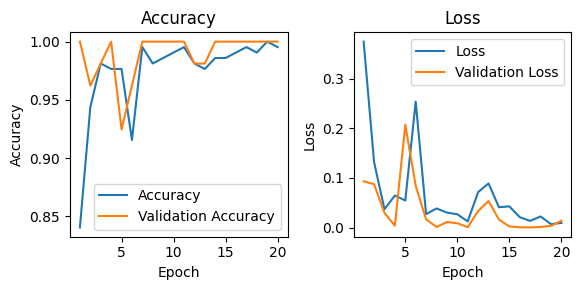

------------------------------
 Accuracy: 0.9953051805496216
 Validation Accuracy: 1.0
 Loss: 0.009490848518908024
 Validation Loss: 0.013892765156924725
 ------------------------------


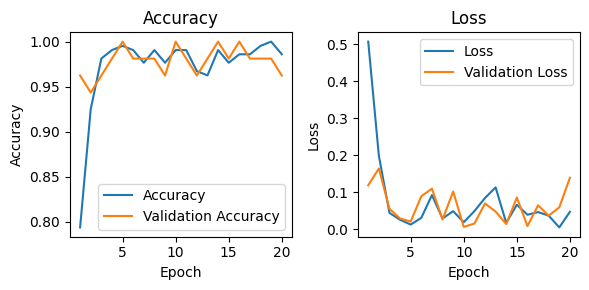

------------------------------
 Accuracy: 0.98591548204422
 Validation Accuracy: 0.9622641801834106
 Loss: 0.04768979549407959
 Validation Loss: 0.13952210545539856
 ------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.69      0.55        29
           1       0.36      0.57      0.44        14
           2       0.00      0.00      0.00        24

    accuracy                           0.42        67
   macro avg       0.27      0.42      0.33        67
weighted avg       0.27      0.42      0.33        67

Confusion Matrix:
 [[20  8  1]
 [ 6  8  0]
 [18  6  0]]


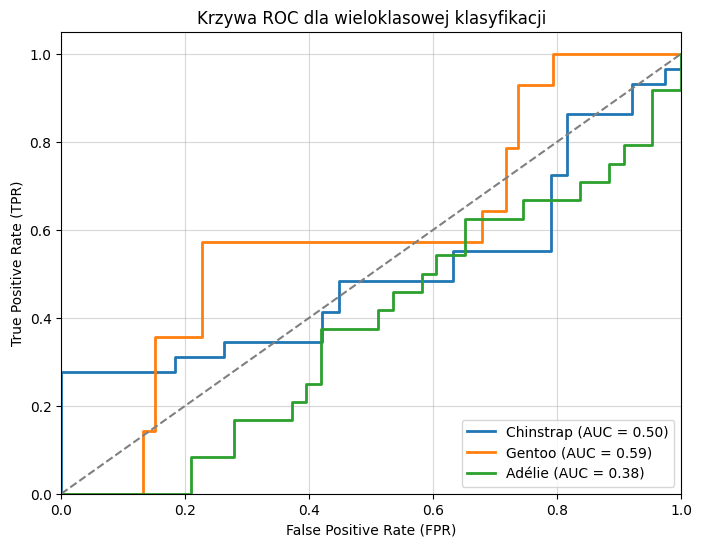

In [146]:
# Ustawienie Hyperband Tuner
tuner = CrossValHyperband(
    hypermodel=create_model_tuning,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    project_name='penguin_model_tuning',
    )

# Wcześniejsze zatrzymanie sieci w przypadku satysfakcjonującego wyniku
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    min_delta=0.001,
    mode='max',
    restore_best_weights=True
)

# Rozpoczęcie tuningu
tuner.search(x=X_train, y=y_train, epochs=100, callbacks=[early_stop])

# Najlepszy model po tuningu
best_par = tuner.get_best_hyperparameters()[0]
best_model = create_model_tuning(best_par)
history, _, _ = cross_validation_keras(create_model_tuning, X_train, y_train, hp=best_par)

for hist in history:
    plot_training_history(hist)

# Ocena najlepszego modelu
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Podsumowanie wyników
print("Classification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes))

# Krzywa ROC dla najlepszego modelu
plot_roc_curve(y_test, y_pred, y_pred.shape[1])

## <span style="color:royalblue;">Podsumowanie projektu budowy sieci neuronowej typu Feed-Forward dla zbioru palmerpenguins</span>
W ramach projektu stworzyłem model Feed-Forward Neural Network (FFNN) do klasyfikacji gatunków pingwinów na podstawie danych dostępnych w zbiorze palmerpenguins. Celem było stworzenie modelu, który efektywnie klasyfikuje dane na trzy kategorie (gatunki: Chinstrap, Gentoo, Adélie) na podstawie cech takich jak długość dzioba, głębokość dzioba, długość płetwy i masa ciała. Model był trenowany na tych danych, a jego wydajność oceniona za pomocą miar takich jak precision, recall, f1-score oraz accuracy.

**Wytłumaczenie zależności między prostym modelem a modelem z dostrojeniem parametrów:**

Prosty model, który używa domyślnych ustawień, może nie być wystarczająco złożony, aby uchwycić skomplikowane zależności między cechami w danych. W tym przypadku model mógł mieć zbyt mało neuronów lub zbyt prostą strukturę, przez co nie był w stanie dokładnie sklasyfikować wszystkich gatunków pingwinów, co skutkowało niskimi wynikami w metrykach. Z kolei po dostrojeniu parametrów, takich jak liczba warstw i neuronów, optymalizacja funkcji kosztu, oraz regulacja (np. poprzez Dropout), model stał się bardziej złożony i lepiej dopasowany do danych, co skutkowało poprawą wyników. Wyniki i tak są dobre, wynika to z faktu, że zbiór danych palmerpenguins jest przystępny dla sieci, nasz eksperyment z wykorzystaniem sieci typu Feed-Forward okazał się dobrze działać z wykorzystaniem zarówno podstawowego oraz rozbudowanego modelu wykorzystującego dostrajanie parametrów.